## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_ms_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID' )
# Display the data table for preview
combine_ms_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice
mice_count_df = combine_ms_df["Mouse ID"].nunique()
mice_count_df

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combine_ms_df[["Mouse ID", "Timepoint"]].duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_combine_df = combine_ms_df[combine_ms_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
dup_combine_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_names = combine_ms_df[combine_ms_df['Mouse ID']=='g989'].index

new_combine_ms_df = combine_ms_df.drop(index_names)

new_combine_ms_df.head

<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898   

In [6]:
# Checking the number of mice in the clean DataFrame.
new_mouse_df = new_combine_ms_df["Mouse ID"].nunique()
new_mouse_df

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_df = new_combine_ms_df.groupby("Drug Regimen")

#perform calculations
drug_mean = drug_df["Tumor Volume (mm3)"].mean()
drug_median = drug_df["Tumor Volume (mm3)"].median()
drug_var = drug_df["Tumor Volume (mm3)"].var()
drug_stddev = drug_df["Tumor Volume (mm3)"].std()
drug_sem = drug_df["Tumor Volume (mm3)"].sem()

#create dataframe for calculations
drug_calc_df = pd.DataFrame({
    "Tumor Vol Mean": drug_mean,
    "Tumor Vol Median": drug_median,
    "Tumor Vol Variance": drug_var,
    "Tumor Vol Standard Dev": drug_stddev,
    "Tumor Vol SEM": drug_sem
})

#format numbers
drug_calc_df["Tumor Vol Mean"] = drug_calc_df["Tumor Vol Mean"].map("{:,.2f}".format)
drug_calc_df["Tumor Vol Median"] = drug_calc_df["Tumor Vol Median"].map("{:,.2f}".format)
drug_calc_df["Tumor Vol Variance"] = drug_calc_df["Tumor Vol Variance"].map("{:,.2f}".format)
drug_calc_df["Tumor Vol Standard Dev"] = drug_calc_df["Tumor Vol Standard Dev"].map("{:,.2f}".format)
drug_calc_df["Tumor Vol SEM"] = drug_calc_df["Tumor Vol SEM"].map("{:,.4f}".format)

#print table
drug_calc_df

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Standard Dev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.3293
Ceftamin,52.59,51.78,39.29,6.27,0.4698
Infubinol,52.88,51.82,43.13,6.57,0.4922
Ketapril,55.24,53.70,68.55,8.28,0.6039
Naftisol,54.33,52.51,66.17,8.13,0.5965
Placebo,54.03,52.29,61.17,7.82,0.5813
Propriva,52.32,50.45,43.85,6.62,0.5443
Ramicane,40.22,40.67,23.49,4.85,0.3210
Stelasyn,54.23,52.43,59.45,7.71,0.5731


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_df["Tumor Volume (mm3)"].agg(['mean','median','var', 'std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

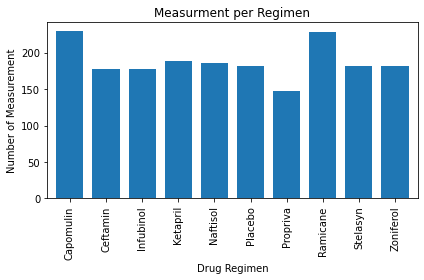

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_df["Tumor Volume (mm3)"].count().plot(kind = "bar", title =
                                          "Measurment per Regimen", width = .75)

plt.ylabel("Number of Measurement")
plt.tight_layout()
plt.show()


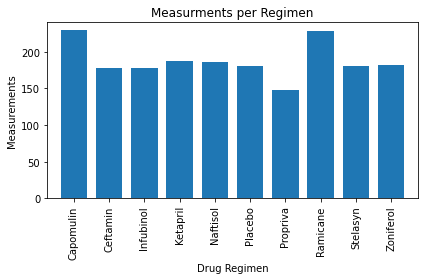

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
bar_plot_df = pd.DataFrame(drug_df["Tumor Volume (mm3)"].count())
bar_plot_df = bar_plot_df.reset_index()

drugs_bar_plot = bar_plot_df["Drug Regimen"]
measurements = bar_plot_df["Tumor Volume (mm3)"]

x_axis = len(drugs_bar_plot)
plt.title("Measurments per Regimen", loc='center')
plt.xlim(-.75, len(drugs_bar_plot)-.25)
plt.ylim(0, max(measurements) +10)
plt.xticks(rotation = 90)
plt.bar(drugs_bar_plot, measurements, width =.75, align ="center")
plt.ylabel("Measurements")
plt.xlabel("Drug Regimen")

plt.tight_layout()
plt.show()


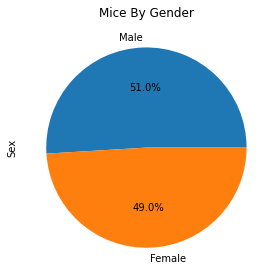

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

new_combine_ms_df["Sex"].value_counts().plot(kind = "pie", 
                                             title = "Mice By Gender", autopct="%1.1f%%")

plt.tight_layout()
plt.show()

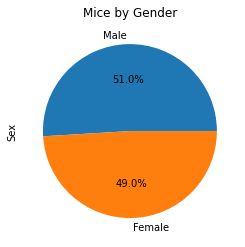

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = new_combine_ms_df["Sex"].value_counts()
categories = new_combine_ms_df["Sex"].unique()

labels = categories

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%')
ax1.set_title('Mice by Gender')
ax1.set_ylabel('Sex')

plt.tight_layout
plt.show()


## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_id_df = new_combine_ms_df.groupby(["Mouse ID", "Drug Regimen"], as_index=False)
mouse_id_df = pd.DataFrame(mouse_id_df["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_final_df = mouse_id_df.merge(new_combine_ms_df)

index_names = mouse_final_df[(mouse_final_df["Drug Regimen"]!="Capomulin")
                            & (mouse_final_df["Drug Regimen"]!= "Ramicane")
                            & (mouse_final_df["Drug Regimen"]!= "Infubinol")
                            & (mouse_final_df["Drug Regimen"]!="Ceftamin")].index

#drop indexes
mouse_final_df.drop(index_names, inplace = True)

#display df 
mouse_final_df.head()


,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
3,a275,Ceftamin,45,Female,20,28,62.999356,3
6,a411,Ramicane,45,Male,3,22,38.407618,1
7,a444,Ramicane,45,Female,10,25,43.047543,0


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
